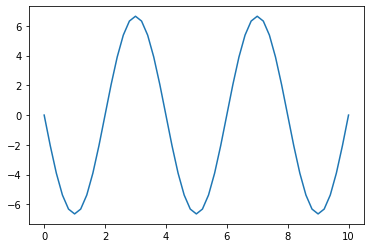

In [ ]:
# CS7GV2 Mathematics of Light and Sound
# ZHIPENG JIA
# ID 20327934
# Question 3 Iterative simulation for wavemotion over time

import numpy as np
import matplotlib.pyplot as plt

# wave velocity
c = 5
# length of string
L = 10
# Time period
T = 0.5
# intervals of equal duration
dt = 0.5
# intervals of equal distance
dx = 0.2


# "Solve u_tt=c^2*u_xx + f on (0,L)x(0,T]."
def solver(I, V, f, dx, L, dt, c, T):
    Nt = int(round(T / dt))
    # Mesh points in time
    t = np.linspace(0, Nt * dt, Nt + 1)
    Nx = int(round(L / dx))
    # Mesh points in space
    x = np.linspace(0, L, Nx+1)
    # Help variable in the scheme
    C2 = (c * dt / dx)**2
    # Make sure dx and dt are compatible with x and t
    # dx = x[1] - x[0]
    dt = t[1] - t[0]
    if f is None or f == 0:
        f = lambda x, t: 0
    if V is None or V == 0:
        V = lambda x: 0
    # Solution array at new time level
    u = np.zeros(Nx + 1)
    # Solution at 1 time level back
    u_n = np.zeros(Nx + 1)
    # Solution at 2 time levels back
    u_nm1 = np.zeros(Nx + 1)
    # Load initial condition into u_n
    for i in range(0, Nx + 1):
        u_n[i] = I(x[i])

    # Special formula for first time step
    n = 0
    for i in range(1, Nx):
        u[i] = u_n[i] + dt * V(x[i]) + \
                0.5 * C2 * (u_n[i-1] - 2 * u_n[i] + u_n[i+1]) + \
                0.5 * dt**2 * f(x[i], t[n])
    u[0] = 0
    u[Nx] = 0

    # Switch variables before next step
    u_nm1[:] = u_n
    u_n[:] = u
    for n in range(1, Nt):
        # Update all inner points at time t[n+1]
        for i in range(1, Nx):
            u[i] = -u_nm1[i] + 2*u_n[i] + C2 * (u_n[i-1] - 2*u_n[i] + u_n[i+1]) + \
                    dt**2 * f(x[i], t[n])
        # Insert boundary conditions
        u[0] = 0
        u[Nx] = 0

        # Switch variables before next step
        u_nm1[:] = u_n
        u_n[:] = u

    return u, x, t


s_u, s_x, s_t = solver(lambda i: np.sin(i / 2 * np.pi), 0, 0, dx, L, dt, c, T)
plt.plot(s_x, s_u)
plt.show()

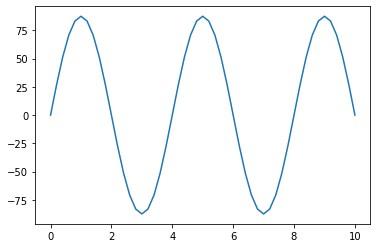

In [ ]:
s_u, s_x, s_t = solver(lambda i: np.sin(i / 2 * np.pi), 0, 0, dx, L, dt, c, T + 0.5)
plt.plot(s_x, s_u)
plt.show()